In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [337]:
out_dir = os.path.join(os.getcwd(), "../../out")
print()
palette = dict(
    Train=sns.color_palette()[0],
    Val=sns.color_palette()[3]
)

In [338]:
def plot_data(ax, data, x, y):
    if 'kind' in data:
        sns.scatterplot(x=data[x], y=data[y], ax=ax, hue=data['kind'], palette=palette)
    else:
        sns.scatterplot(x=data[x], y=data[y], ax=ax)
    ax.set_xlim(0, df[x].max() + 1)
    ax.set_ylim(0, df[y].max() + 500)

def plot_model(ax, data, x, y, model):
    plot_data(ax, data, x, y)
    y_hat = model.predict(data[[x]])
    sns.lineplot(x=data[x], y=y_hat, color='orange', linewidth=3, ax=ax)
    return y_hat

In [339]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

df_train, df_val = train_test_split(df, random_state=3, shuffle=True, test_size=50)
print(df_train.shape, df_val.shape)
df.loc[df_train.index, 'kind'] = 'Train'
df.loc[df_val.index, 'kind'] = 'Val'

(109, 2) (50, 2)


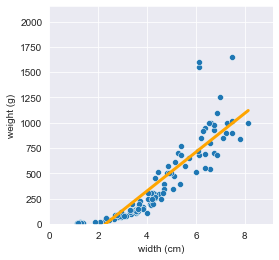

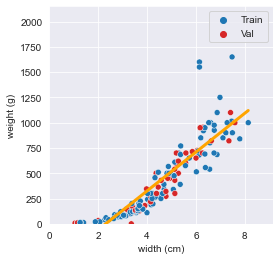

MSE Linear Regression = 33174
MSE Linear Regression = 14667


In [340]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Erstellen vom Modell
lr.fit(X=df_train[['width (cm)']], y=df_train['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df_train, 'width (cm)', 'weight (g)', lr)
plt.savefig(os.path.join(out_dir, 'overfitting-linear-regression.png'), bbox_inches='tight')
plt.show()
_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df, 'width (cm)', 'weight (g)', lr)
plt.savefig(os.path.join(out_dir, 'overfitting-linear-regression-with-val.png'), bbox_inches='tight')
plt.show()
y_hat_train = lr.predict(df_train[['width (cm)']])
y_hat_val = lr.predict(df_val[['width (cm)']])
print("MSE Linear Regression =", round(mean_squared_error(df_train['weight (g)'], y_hat_train)))
print("MSE Linear Regression =", round(mean_squared_error(df_val['weight (g)'], y_hat_val)))

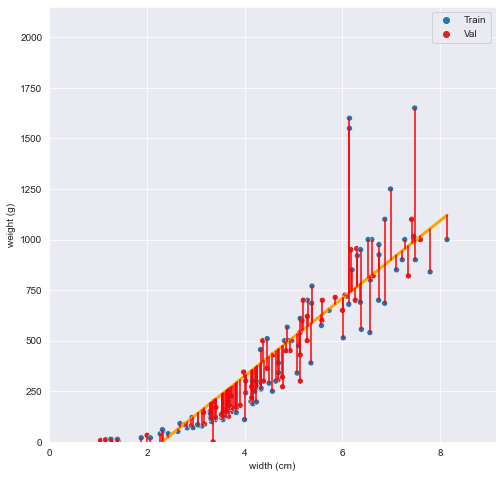

In [341]:
def plot_model_with_errors(ax, df: pd.DataFrame, x: str, y: str, model):
    def plot_error(row):
        # draw line from real point (media_income, media_house_value) to predicted point (media_income, media_house_value_hat)
        ax.plot([row[x], row[x]], [row[y], row['y_hat']], c='red')
    df = df.copy()
    plot_model(ax, df, x, y, model)
    df['y_hat'] = model.predict(df[[x]])
    df.apply(plot_error, axis=1)

_, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_model_with_errors(ax, df, 'width (cm)', 'weight (g)', lr)
plt.show()

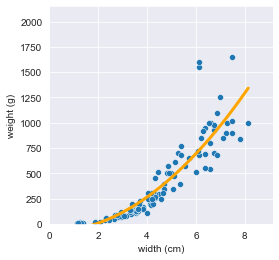

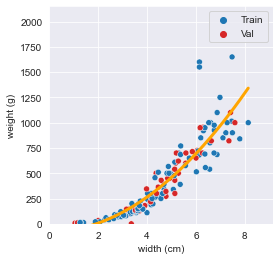

MSE Poly Regression = 27875
MSE Poly Regression = 9127


In [342]:
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

_ = model.fit(X=df_train[['width (cm)']], y=df_train['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df_train, 'width (cm)', 'weight (g)', model)
plt.savefig(os.path.join(out_dir, 'overfitting-polynomial-regression.png'), bbox_inches='tight')
plt.show()
_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df, 'width (cm)', 'weight (g)', model)
plt.savefig(os.path.join(out_dir, 'overfitting-polynomial-regression-with-val.png'), bbox_inches='tight')
plt.show()
y_hat_train = model.predict(df_train[['width (cm)']])
y_hat_val = model.predict(df_val[['width (cm)']])
print("MSE Poly Regression =", round(mean_squared_error(df_train['weight (g)'], y_hat_train)))
print("MSE Poly Regression =", round(mean_squared_error(df_val['weight (g)'], y_hat_val)))

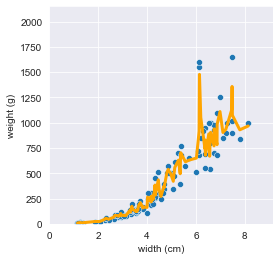

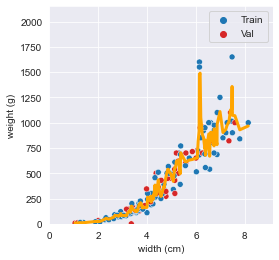

MSE RandomForest Regression (train data) = 4336
MSE RandomForest Regression (new data) =   14824


In [343]:
model = RandomForestRegressor(random_state=42)

_ = model.fit(X=df_train[['width (cm)']], y=df_train['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
y_hat = plot_model(ax, df_train, 'width (cm)', 'weight (g)', model)
plt.savefig(os.path.join(out_dir, 'overfitting-random-forest.png'), bbox_inches='tight')
plt.show()
_, ax = plt.subplots(1, 1, figsize=(4, 4))
y_hat = plot_model(ax, df, 'width (cm)', 'weight (g)', model)
plt.savefig(os.path.join(out_dir, 'overfitting-random-forest-with-val.png'), bbox_inches='tight')
plt.show()
y_hat_train = model.predict(df_train[['width (cm)']])
y_hat_val = model.predict(df_val[['width (cm)']])
print("MSE RandomForest Regression (train data) =", round(mean_squared_error(df_train['weight (g)'], y_hat_train)))
print("MSE RandomForest Regression (new data) =  ", round(mean_squared_error(df_val['weight (g)'], y_hat_val)))